In [1]:
# Importando o Pandas
import pandas as pd

In [2]:
# Carregando o DataFrame com os dados da base
df_ibovespa = pd.read_csv('Assets/Base/ibovespa.csv', sep=',')

In [3]:
# Verificando o DataFrame
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,15.08.2023,116.552,116.809,117.697,116.238,"11,79M","-0,22%"
1,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
2,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
3,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
4,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
5,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
6,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"
7,04.08.2023,119.508,120.586,121.442,119.215,"15,07M","-0,89%"
8,03.08.2023,120.586,120.859,122.619,120.365,"13,03M","-0,23%"
9,02.08.2023,120.859,121.249,121.252,119.798,"10,57M","-0,32%"


In [4]:
# Verificando valores nulos no DataFrame
df_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [5]:
# Encontrando o dado nulo na linha correspondente
df_ibovespa[df_ibovespa['Vol.'].isna()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1865,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [6]:
# Decidimos não alterar o valor NaN nessa ocasião, pois essa alteração não afetará de forma drástica a nossa previsão,
# pois utilizaremos apenas os dados de fechamento de mercado no estudo.
# Caso fosse nessesário poderiamos utilizar a linha de código abaixo para alterar o valor em questão
# df_ibovespa['Vol.'] = df_ibovespa['Vol.'].fillna(0)

In [7]:
# Verificando dados duplicados
df_ibovespa.duplicated().sum()

0

In [8]:
# Verificando o shape do DataFrame
df_ibovespa.shape

(4912, 7)

In [9]:
# Verificando informações do Dataframe
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4912 entries, 0 to 4911
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4912 non-null   object 
 1   Último    4912 non-null   float64
 2   Abertura  4912 non-null   float64
 3   Máxima    4912 non-null   float64
 4   Mínima    4912 non-null   float64
 5   Vol.      4911 non-null   object 
 6   Var%      4912 non-null   object 
dtypes: float64(4), object(3)
memory usage: 268.8+ KB


In [10]:
# Convertendo coluna Data de object para datetime
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'],format='%d.%m.%Y')
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-15,116.552,116.809,117.697,116.238,"11,79M","-0,22%"
1,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
2,2023-08-11,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
3,2023-08-10,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
4,2023-08-09,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
5,2023-08-08,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
6,2023-08-07,119.380,119.509,120.104,118.894,"8,73M","-0,11%"
7,2023-08-04,119.508,120.586,121.442,119.215,"15,07M","-0,89%"
8,2023-08-03,120.586,120.859,122.619,120.365,"13,03M","-0,23%"
9,2023-08-02,120.859,121.249,121.252,119.798,"10,57M","-0,32%"


In [11]:
# Transformando as colunas que estão como float para int
df_ibovespa['Último'] = df_ibovespa['Último'] * 1000
df_ibovespa['Último'] = df_ibovespa['Último'].astype(int)
df_ibovespa['Abertura'] = df_ibovespa['Abertura'] * 1000
df_ibovespa['Abertura'] = df_ibovespa['Abertura'].astype(int)
df_ibovespa['Máxima'] = df_ibovespa['Máxima'] * 1000
df_ibovespa['Máxima'] = df_ibovespa['Máxima'].astype(int)
df_ibovespa['Mínima'] = df_ibovespa['Mínima'] * 1000
df_ibovespa['Mínima'] = df_ibovespa['Mínima'].astype(int)
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-15,116552,116809,117697,116238,"11,79M","-0,22%"
1,2023-08-14,116810,118067,118082,116530,"11,20M","-1,06%"
2,2023-08-11,118065,118350,119054,117415,"11,87M","-0,24%"
3,2023-08-10,118350,118412,119438,118113,"12,69M","-0,05%"
4,2023-08-09,118409,119090,119090,117901,"11,25M","-0,57%"
5,2023-08-08,119090,119378,119553,117492,"10,25M","-0,24%"
6,2023-08-07,119380,119509,120104,118894,"8,73M","-0,11%"
7,2023-08-04,119508,120586,121442,119215,"15,07M","-0,89%"
8,2023-08-03,120586,120859,122619,120365,"13,03M","-0,23%"
9,2023-08-02,120859,121249,121252,119798,"10,57M","-0,32%"


In [12]:
# Importando a bibliotéca matplotlib
import matplotlib.pyplot as plt

In [13]:
# indexando o DataFrame pela data
df_ibovespa_indexData = df_ibovespa.set_index(['Data'])
df_ibovespa_indexData.head(10)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2023-08-15,116552,116809,117697,116238,"11,79M","-0,22%"
2023-08-14,116810,118067,118082,116530,"11,20M","-1,06%"
2023-08-11,118065,118350,119054,117415,"11,87M","-0,24%"
2023-08-10,118350,118412,119438,118113,"12,69M","-0,05%"
2023-08-09,118409,119090,119090,117901,"11,25M","-0,57%"
2023-08-08,119090,119378,119553,117492,"10,25M","-0,24%"
2023-08-07,119380,119509,120104,118894,"8,73M","-0,11%"
2023-08-04,119508,120586,121442,119215,"15,07M","-0,89%"
2023-08-03,120586,120859,122619,120365,"13,03M","-0,23%"


In [14]:
# Salvando o DataFrame
df_ibovespa_indexData.to_csv('Assets/DataFrames/ibov.csv', index=True)

### Visualizando o fechamento diário do Ibovespa no período entre 27-12-2000 a 11-03-2021

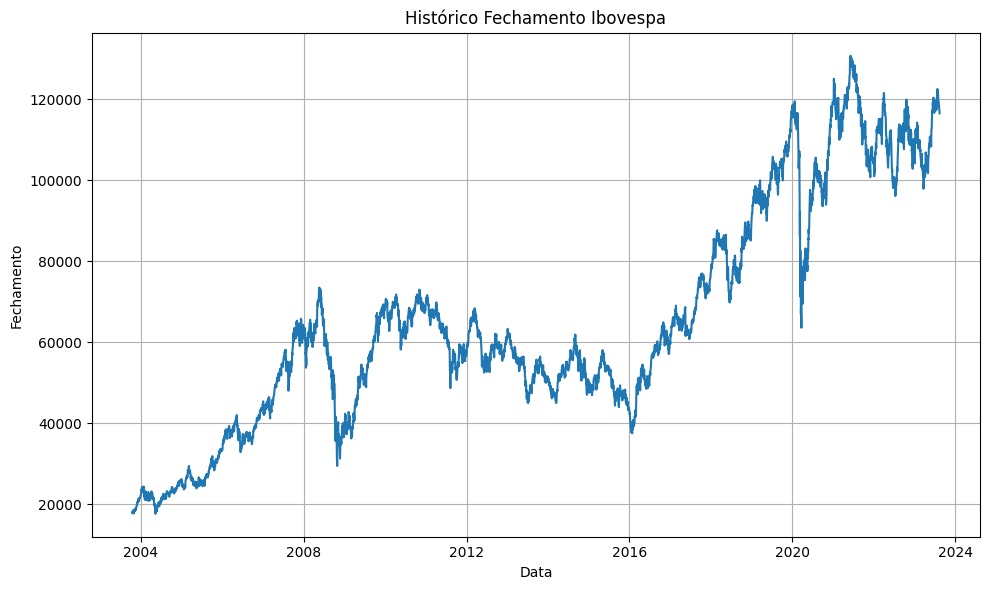

In [54]:
# Criando o gráfico do fechamento histórico do Ibovespa
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Histórico Fechamento Ibovespa')
plt.plot(df_ibovespa_indexData['Último'])
plt.grid()
plt.tight_layout()
plt.savefig('Assets/Graficos/historico.jpg')
plt.show()

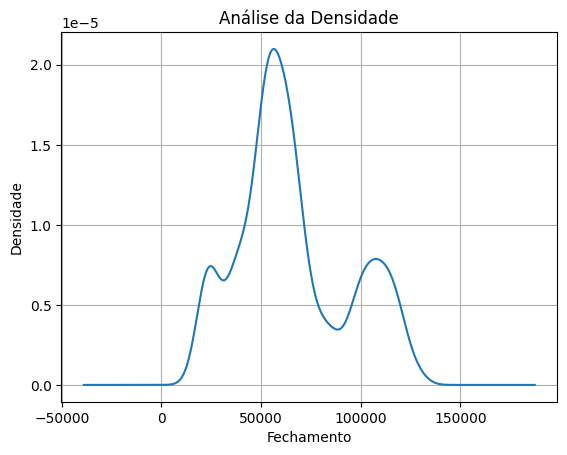

In [53]:
# Distribuição do dataset
df_fechamento = df_ibovespa_indexData['Último']
df_fechamento.plot(kind='kde')
plt.title('Análise da Densidade')
plt.xlabel('Fechamento')
plt.ylabel('Densidade')
plt.grid()
plt.savefig('Assets/Graficos/densidade.jpg')
plt.show()

#### Podemos observar pelo gráfico da densidade que históricamente o fechamento do Ibovespa se concentrou na maior parte do tempo em torno dos 50.000 pontos

In [17]:
# importando o numpy
import numpy as np

In [18]:
# Transformação logarítmica da série temporal
df_ibovespa_indexData_log = np.log(df_ibovespa_indexData['Último'])

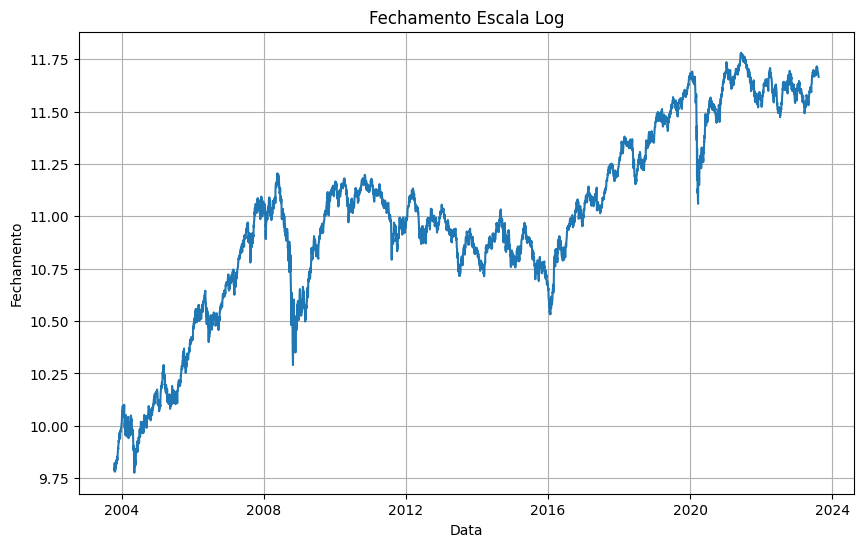

In [52]:
# Gráfico da série temporal logaritmica
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Fechamento Escala Log')
plt.plot(df_ibovespa_indexData_log)
plt.grid()
plt.savefig('Assets/Graficos/log.jpg')
plt.show()

In [20]:
# Calculando a média móvel
rolmean = df_ibovespa_indexData['Último'].rolling(12).mean()
rolmean_log = df_ibovespa_indexData_log.rolling(12).mean()

In [21]:
# Calculando o desvio padrão
rolstd = df_ibovespa_indexData['Último'].rolling(12).std()
rolstd_log = df_ibovespa_indexData_log.rolling(12).std()

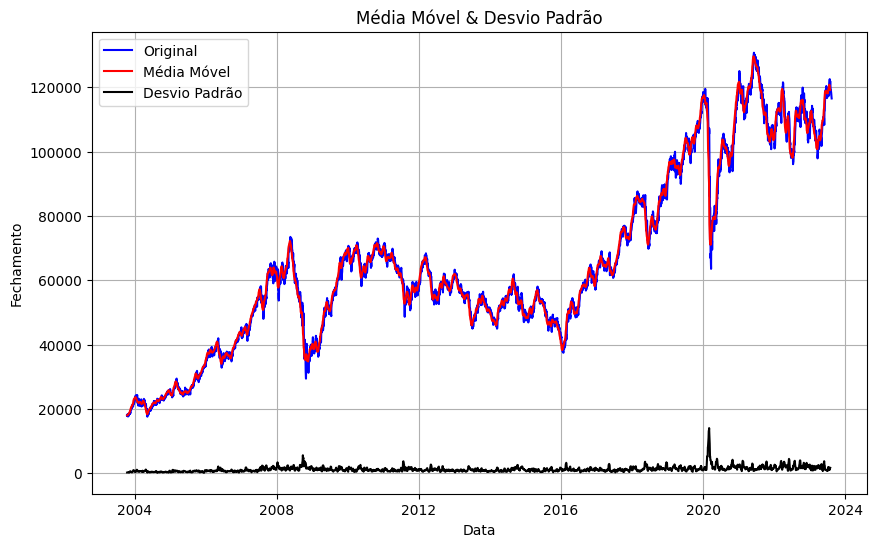

In [22]:
# Média Móvel & Desvio Padrão

plt.figure(figsize=(10,6))
plt.plot(df_ibovespa_indexData['Último'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Média Móvel')
plt.plot(rolstd, color='black', label='Desvio Padrão')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Média Móvel & Desvio Padrão')
plt.grid()
plt.savefig('Assets/Graficos/mm_std.jpg')
plt.show()

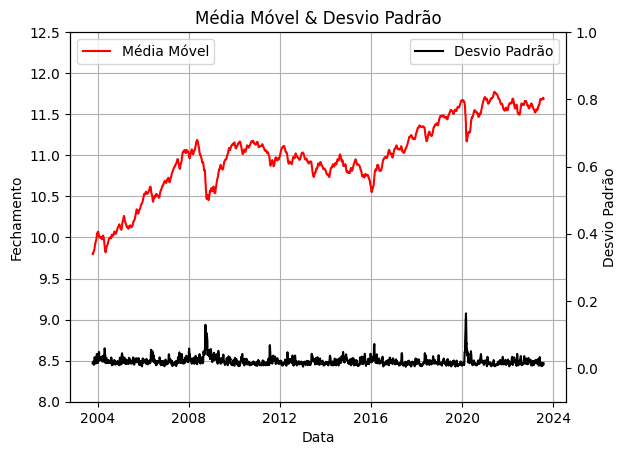

<Figure size 1000x600 with 0 Axes>

In [23]:
# Média Móvel & Desvio Padrão

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,6))
ax1.plot(rolmean_log, color='red', label='Média Móvel')
ax2 = ax1.twinx()
ax2.plot(rolstd_log, color='black', label='Desvio Padrão')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Data')
ax1.set_ylabel('Fechamento')
ax1.set_title('Média Móvel & Desvio Padrão')
ax1.set_ylim(8,12.5)
ax2.set_ylabel('Desvio Padrão')
ax2.set_ylim(-0.1, 1)
ax1.grid()
fig.savefig('Assets/Graficos/mm_std_log.jpg')
plt.show()

In [24]:
# Instalação Auto Arima
#%pip install pmdarima

In [25]:
from pmdarima.model_selection import train_test_split

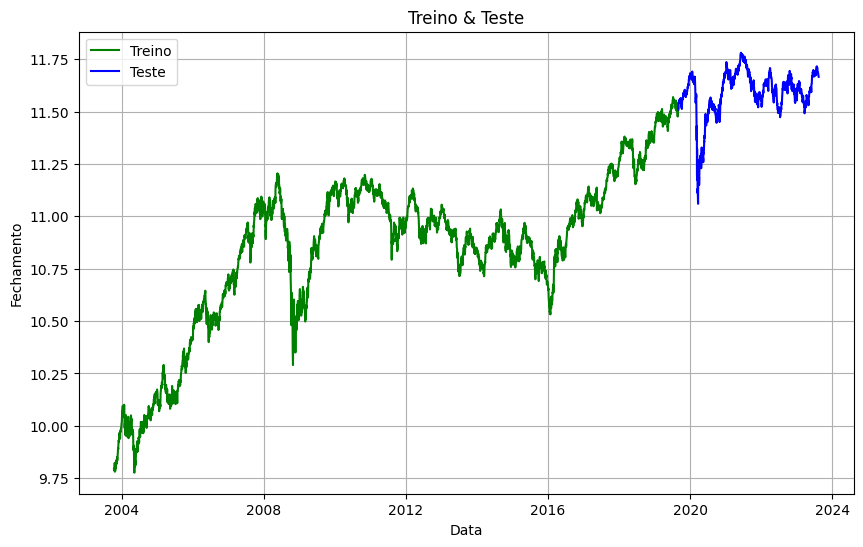

In [26]:
#Dividindo os dados em treino e teste
train_len = int(df_ibovespa_indexData_log.shape[0]*0.8)
train_data, test_data = train_test_split(df_ibovespa_indexData_log.sort_index(),train_size=train_len)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Treino & Teste')
plt.plot(train_data, 'green', label='Treino')
plt.plot(test_data, 'blue', label='Teste')
plt.legend()
plt.savefig('Assets/Graficos/treino_teste.jpg')
plt.show()

In [27]:
# Importando o Seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
# Decompondo a series de forma sazonal
resultados = seasonal_decompose(df_ibovespa_indexData_log, model='multiplicative', period=30)

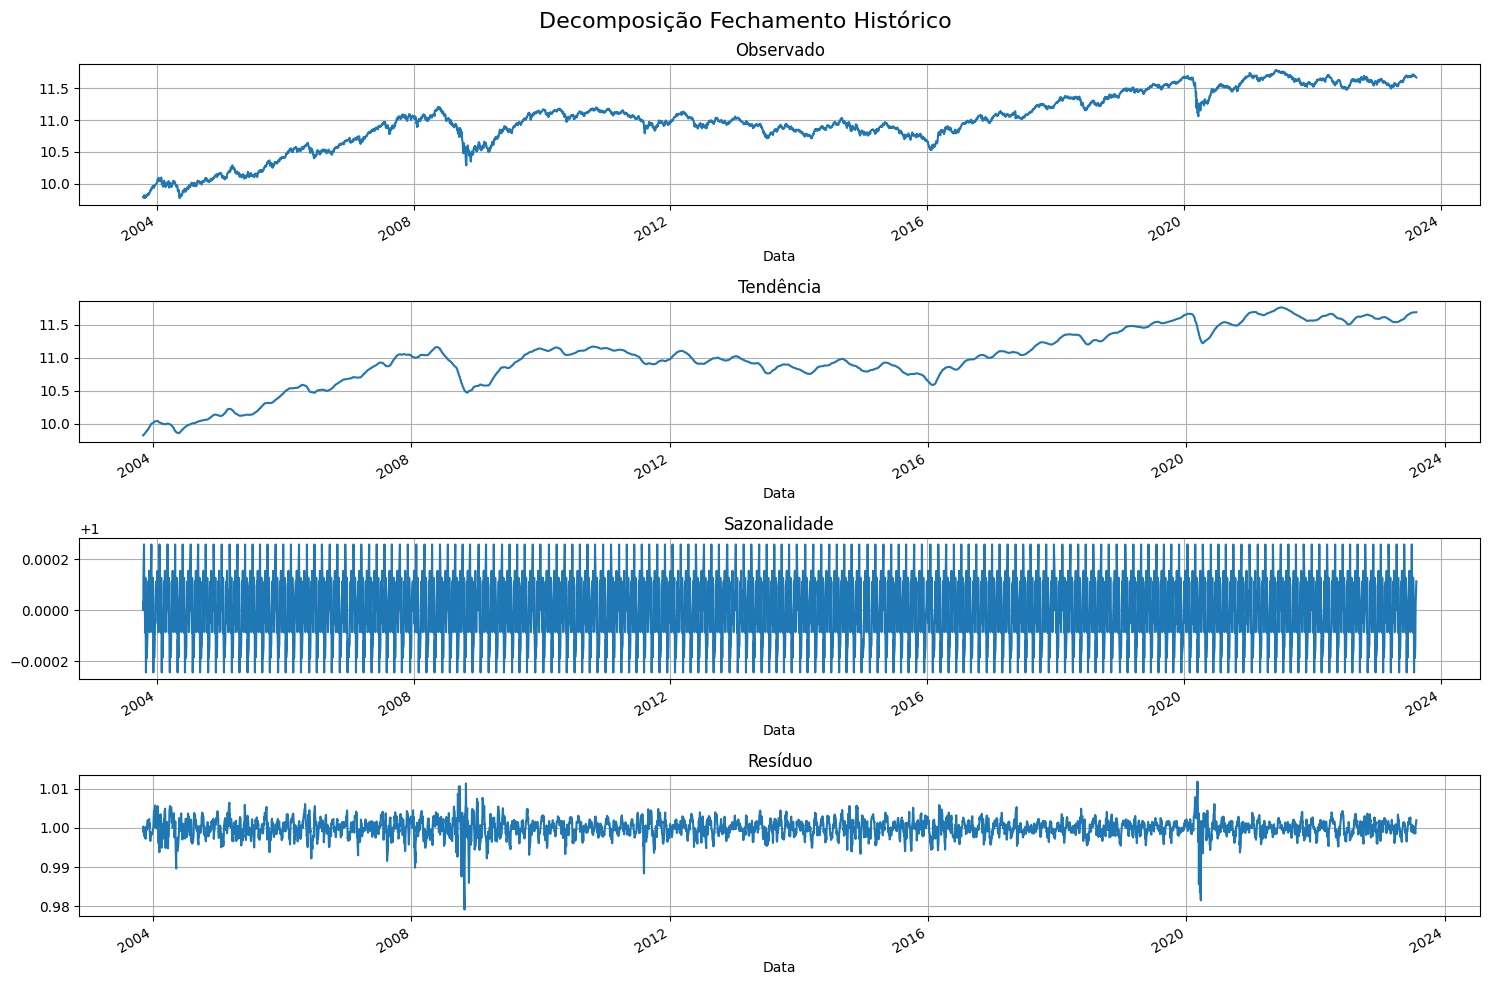

In [29]:
# Plotando a serie decomposta
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)
fig.suptitle('Decomposição Fechamento Histórico', fontsize=16)
ax1.set_title('Observado')
ax2.set_title('Tendência')
ax3.set_title('Sazonalidade')
ax4.set_title('Resíduo')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
fig.tight_layout()
plt.savefig('Assets/Graficos/seasonal.jpg')
plt.show()

In [30]:
# Instalando o statsmodels
#%pip install statsmodels

In [31]:
# Importando o teste de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

In [32]:
# Performando teste aumentado de Dickey-Fuller para verificar se a nossa série temporal (df_ibovespa_indexData_log) é estacionária
print('Resultados do teste Dickey Fuller:')
dftest = adfuller(df_ibovespa_indexData_log, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'p-valor', 'Lags utilizados', 'Número de observações utilizadas'])
for key, value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value

print(dfoutput)

Resultados do teste Dickey Fuller:
Estatística de Teste                  -0.178197
p-valor                                0.941071
Lags utilizados                        6.000000
Número de observações utilizadas    4905.000000
Valor crítico (1%)                    -3.431684
Valor crítico (5%)                    -2.862129
Valor crítico (10%)                   -2.567084
dtype: float64


#### Observação: Pelo teste de Dickey-Fuller podemos obsevar um p-valor alto e a estatística de teste mais próxima dos valores críticos, o que significa que podemos dizer que nossa série temporal não é estacionária.

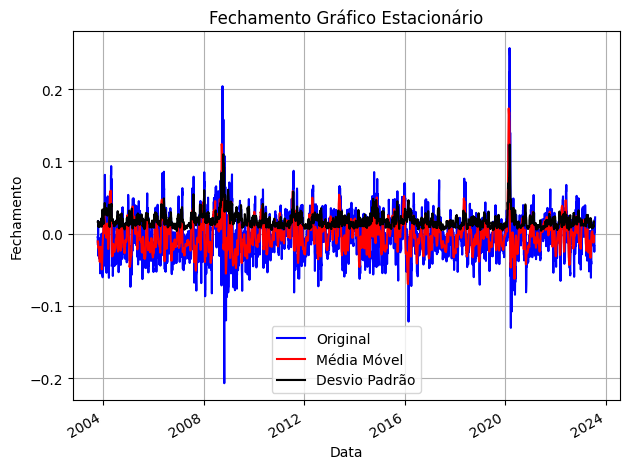

In [33]:
# Transformando série temporal não estacionária em estacionária
df_estacionaria = (df_ibovespa_indexData_log - rolmean_log).dropna()

mm_estacionaria = df_estacionaria.rolling(12).mean()

std_estacionaria = df_estacionaria.rolling(12).std()

fig, ax = plt.subplots()
df_estacionaria.plot(ax=ax, color='blue', label='Original')
mm_estacionaria.plot(ax=ax, color='red', label='Média Móvel')
std_estacionaria.plot(ax=ax, color='black', label='Desvio Padrão')
plt.legend(loc='best')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Fechamento Gráfico Estacionário')
plt.grid()
plt.savefig('Assets/Graficos/estacionario.jpg')
plt.tight_layout()

In [34]:
# Performando teste aumentado de Dickey-Fuller para verificar se a nossa série temporal (df_estacionaria) é estacionária
print('Resultados do teste Dickey Fuller:')
dftest = adfuller(df_estacionaria, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'p-valor', 'Lags utilizados', 'Número de observações utilizadas'])
for key, value in dftest[4].items():
    dfoutput['Valor crítico (%s)'%key] = value

print(dfoutput)

Resultados do teste Dickey Fuller:
Estatística de Teste               -1.305438e+01
p-valor                             2.109676e-24
Lags utilizados                     2.000000e+01
Número de observações utilizadas    4.880000e+03
Valor crítico (1%)                 -3.431691e+00
Valor crítico (5%)                 -2.862132e+00
Valor crítico (10%)                -2.567085e+00
dtype: float64


In [35]:
# Importando teste acf e pacf do statsmodels
from statsmodels.tsa.stattools import acf, pacf

In [36]:
# Realizando o plot de autocorrelação do nosso dataset
lag_acf = acf(df_estacionaria, nlags=25)
lag_pacf = pacf(df_estacionaria, nlags=25)

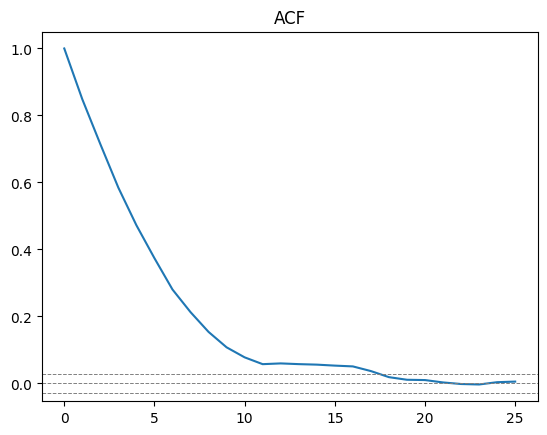

In [37]:
# Gráfico ACF (Valor Q)
plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.title("ACF")
plt.savefig('Assets/Graficos/acf.jpg')
plt.show()

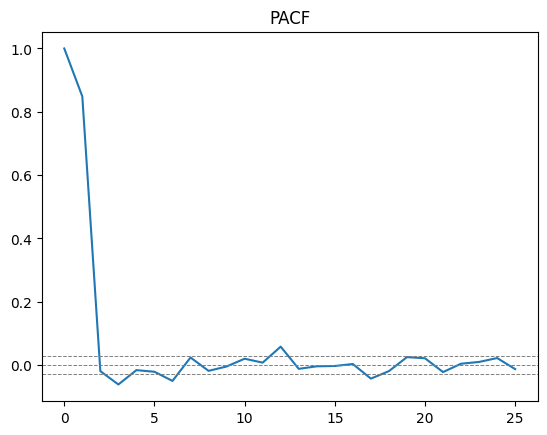

In [38]:
# Gráfico PACF (Valor P)
plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y = 1.96/(np.sqrt((len(df_estacionaria)-1))), linestyle='--', color='gray', linewidth=0.7)

plt.title("PACF")
plt.savefig('Assets/Graficos/pacf.jpg')
plt.show()

#### Pelos gráficos ACF e PACF temos que Q=4 e P=2

In [39]:
# Importando modelo arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

Plot do Modelo ARIMA


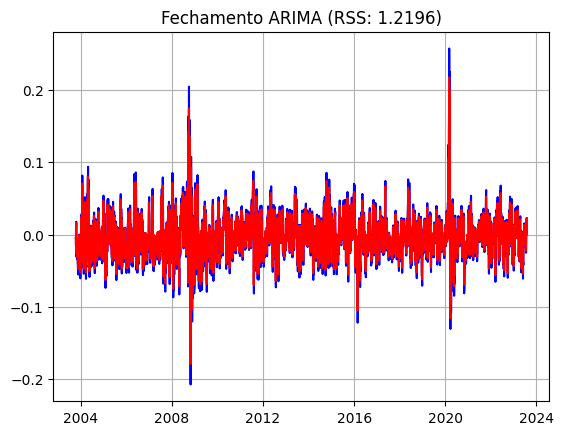

                               SARIMAX Results                                
Dep. Variable:                 Último   No. Observations:                 4901
Model:                 ARIMA(2, 1, 4)   Log Likelihood               13378.536
Date:                Tue, 15 Aug 2023   AIC                         -26743.072
Time:                        16:51:34   BIC                         -26697.593
Sample:                             0   HQIC                        -26727.116
                               - 4901                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1395      0.157     -0.890      0.374      -0.447       0.168
ar.L2          0.8016      0.126      6.353      0.000       0.554       1.049
ma.L1          0.0036      0.157      0.023      0.9

In [40]:
# Modelo Arima

modelo = ARIMA(df_estacionaria, order=(2,1,4))
resultados_ARIMA = modelo.fit()
plt.plot(df_estacionaria, color='blue')
plt.plot(resultados_ARIMA.fittedvalues, color='red')
plt.title('Fechamento ARIMA (RSS: %.4f'%sum((resultados_ARIMA.fittedvalues - df_estacionaria)**2)+')')
print('Plot do Modelo ARIMA')
plt.grid()
plt.savefig('Assets/Graficos/arima.jpg')
plt.show()
print(resultados_ARIMA.summary())

In [41]:
# Importando o Auto ARIMA
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20868.132, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-20866.387, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-20866.399, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20867.508, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20864.132, Time=0.39 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.094 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3929
Model:               SARIMAX(0, 1, 0)   Log Likelihood               10436.066
Date:                Tue, 15 Aug 2023   AIC                         -20868.132
Time:                        16:51:36   BIC                         -20855.581
Sample:                             0   HQIC                        -20863.679
                               - 3929                             

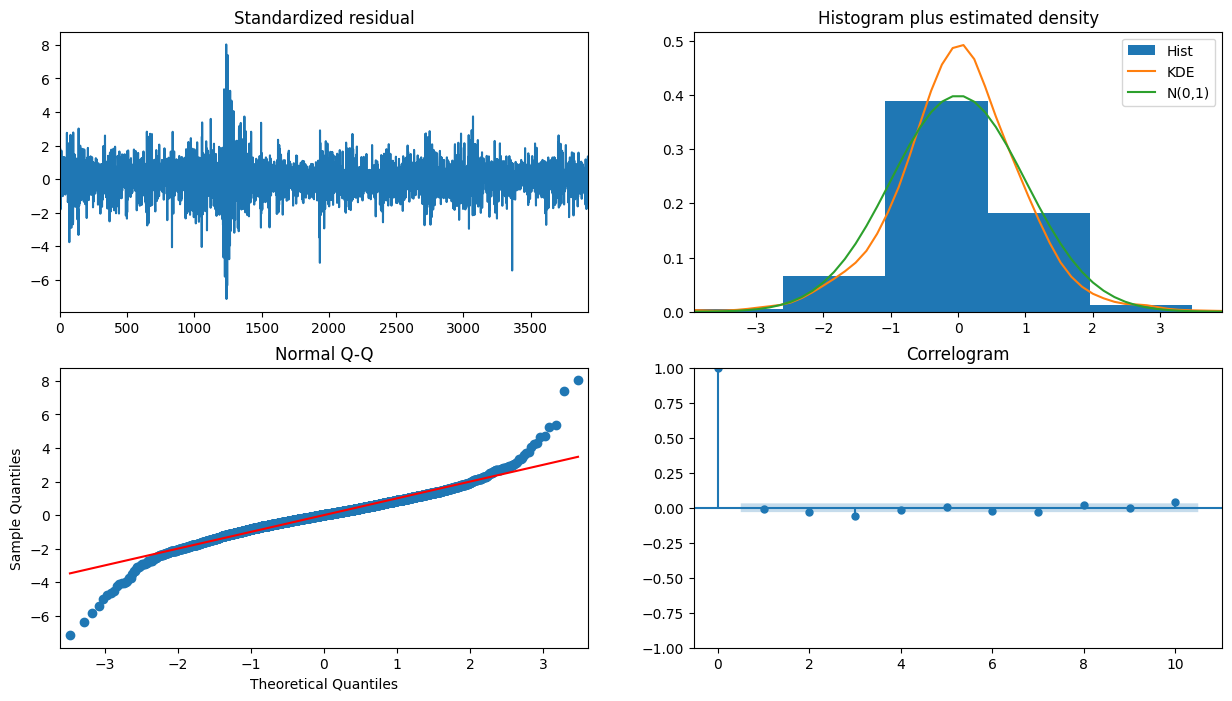

In [42]:
arima_fit = auto_arima(train_data.sort_index(), start_p=0, start_q=0,
                      test='adf',       # usa o teste adf para achar o 'd' otimizado
                      max_p=5, max_q=5, # máximo p e q
                      m=1,              # frequência da série
                      d=None,           # deixa o modelo decidir o 'd'
                      seasonal=False,   # Sem sazonalidade
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(arima_fit.summary())
arima_fit.plot_diagnostics(figsize=(15,8))
plt.savefig('Assets/Graficos/auto_arima.jpg')
plt.show()

In [43]:
# Fazendo a previsão com os dados ajustados
prediction, confint = arima_fit.predict(len(test_data), return_conf_int=True,alpha=0.05)

In [44]:
# Previsão
prediction

3929    11.519605
3930    11.520044
3931    11.520483
3932    11.520922
3933    11.521361
          ...    
4907    11.948915
4908    11.949354
4909    11.949793
4910    11.950232
4911    11.950671
Length: 983, dtype: float64

In [45]:
# Intervalo de confiança
confint

array([[11.4863267 , 11.55288314],
       [11.47298138, 11.5671064 ],
       [11.46284329, 11.57812242],
       ...,
       [10.9074884 , 12.99209725],
       [10.90739626, 12.99306733],
       [10.90730438, 12.99403714]])

In [46]:
from pmdarima.metrics import smape

smape(test_data.values,prediction)

1.417539969637368

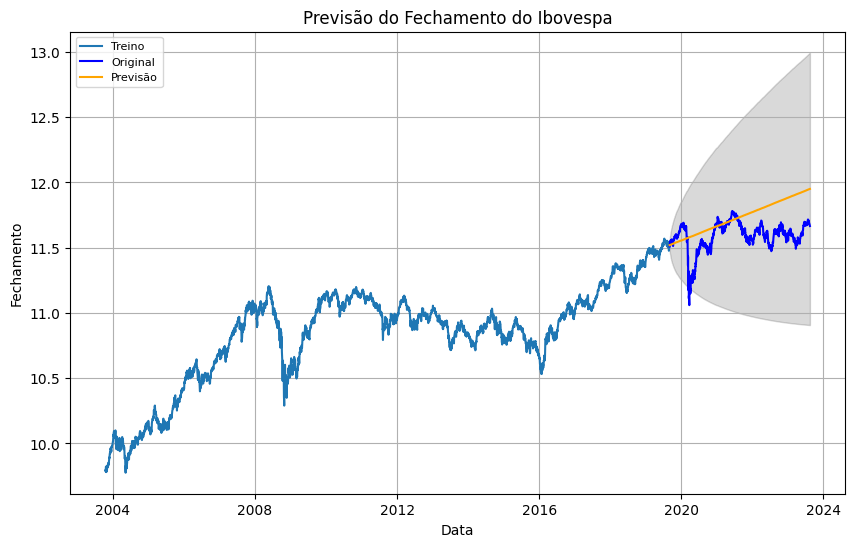

In [55]:
# Previsão
# Transformando em Series Pandas
fc_series = pd.Series(prediction.values, index=test_data.sort_index().index)
lower_series = pd.Series(confint[:, 0], index=test_data.sort_index().index)
upper_series = pd.Series(confint[:, 1], index=test_data.sort_index().index)

# Plotando
plt.figure(figsize=(10,6), dpi=100)
plt.plot(train_data, label='Treino')
plt.plot(test_data, color = 'blue', label='Original')
plt.plot(fc_series, color = 'orange',label='Previsão')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Previsão do Fechamento do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.savefig('Assets/Graficos/previsao.jpg')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [49]:
# Relatório de performance
mse = mean_squared_error(test_data.values, prediction.values)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data.values, prediction.values)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data.values, prediction.values))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction.values - test_data.values)/np.abs(test_data.values))
print('MAPE: '+str(mape))

MSE: 0.040290750459765705
MAE: 0.16540199812023165
RMSE: 0.20072556005592737
MAPE: 0.014319964423499875


##### Com um MAPE de aproximadamente 1,4% o modelo tem 98,6% de acurácia para prever as próximas observações dentro do intervalo de confiança

# Sites consultados

In [50]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/
# https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/

# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.AutoARIMA.html